In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
new_df = df[df['species']!='virginica'] #Removing virginica from the data

In [5]:
new_df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [6]:
new_df.shape

(100, 5)

In [7]:
new_df['species'] = new_df['species'].map({'setosa':0,'versicolor':1})

C:\Users\User12\AppData\Local\Temp\ipykernel_9676\4279560969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['species'] = new_df['species'].map({'setosa':0,'versicolor':1})


In [8]:
new_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [30]:
x = new_df['sepal_length']
y = new_df['species']

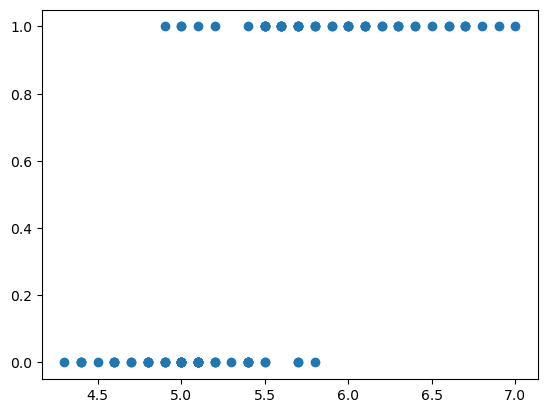

In [31]:
plt.scatter(x,y)

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1, random_state=42)

In [33]:
log_Reg = LogisticRegression()
log_Reg.fit(xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))

LogisticRegression()

<Axes: xlabel='sepal_length', ylabel='species'>

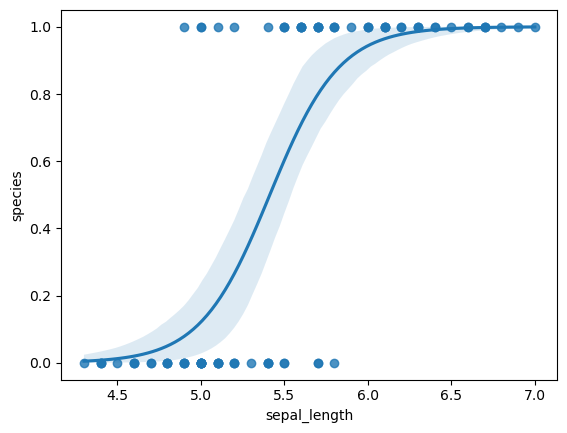

In [35]:
warnings.filterwarnings('ignore')
sns.regplot(x=xtrain, y=ytrain, logistic=True)

In [44]:
y_pred = log_Reg.predict(xtest.values.reshape(-1, 1))
print('MSE:', mean_squared_error(ytest,y_pred))
print('MAE:', mean_absolute_error(ytest,y_pred))
print('coef:', log_Reg.coef_)
print('y_intercept:', log_Reg.intercept_)
print('Accuracy_Score:', accuracy_score(ytest,y_pred))

MSE: 0.0
MAE: 0.0
coef: [[2.99210202]]
y_intercept: [-16.23664509]
Accuracy_Score: 1.0


In [45]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred1 = dt.predict(xtest.values.reshape(-1,1))
print('Accuracy_Score:', accuracy_score(ytest,y_pred1))

Accuracy_Score: 1.0
